### Mario Enrique Pisquiy Gómez
#### Carné 20200399

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import errno
import cvlib
import io


%matplotlib inline
#plt.style.use('dark_background') 
PATH = 'C:/GitHub/pythonPrograms/computerVision2023/proyectos/LicencePlates/'

In [353]:
filename=PATH+'images10.jpg'

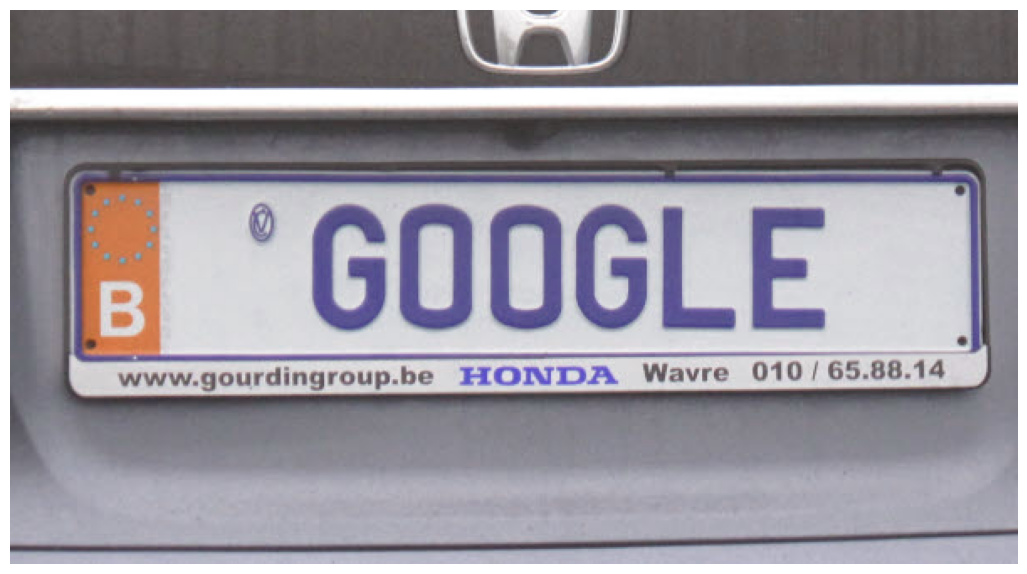

In [354]:
color = (0,255,0)
im = cv.imread(filename,cv.IMREAD_COLOR)
cvlib.imgview(im)

In [ ]:
def binarizacion(image):
    imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    binarized = cv.adaptiveThreshold(imgray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,0)
    return binarized

In [ ]:
def encontrarContornos(image):
    mode = cv.RETR_TREE # contour retrieval mode
    method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
    contours, hierarchy = cv.findContours(image, mode, method[0])
    return contours

In [ ]:
def encontrarPlaca(image):
    contours = encontrarContornos(image)
    contorno = []
    caracteristicas = []
    extent = 0

    for c in contours:
        # limitar el contorno, para tener un área más ajustada. 
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        x,y,w,h = cv.boundingRect(c)
        area = cv.contourArea(approx)
        if (w>h and area > 4000): #pongo el mínimo del área
            rect_area = w*h
            extent1 = float(area)/rect_area
            if extent1 > extent:
                extent = extent1
                contorno = c
                caracteristicas = [x,y,w,h]
                
    placa = im[caracteristicas[1]:caracteristicas[1]+caracteristicas[3],caracteristicas[0]:caracteristicas[0]+caracteristicas[2]]
    return placa

In [ ]:
def encontrarNumeros(image):
    contours = encontrarContornos(image)
    contorno = []
    extent = 0

    for c in contours:
        # limitar el contorno, para tener un área más ajustada. 
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        x,y,w,h = cv.boundingRect(c)
        area = cv.contourArea(approx)
        if (w<h and area > 750): #pongo el mínimo del área
            contorno.append(c)

    return contorno

In [ ]:
binarized = binarizacion(im)
placa = encontrarPlaca(binarized)
numeros = encontrarNumeros(placa)

IndexError: list index out of range

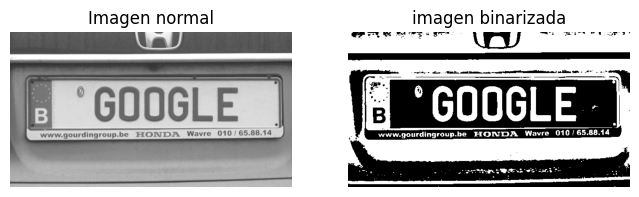

In [424]:
# thresh_val = 100
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
binarized = cv.adaptiveThreshold(imgray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,127,0)
cvlib.imgcmp(imgray,binarized, ['Imagen normal', 'imagen binarizada'])

In [361]:
kernel = np.array([[  0, 255,  0],
                   [  0, 255,  0],
                   [  0, 255,  0]], np.uint8)

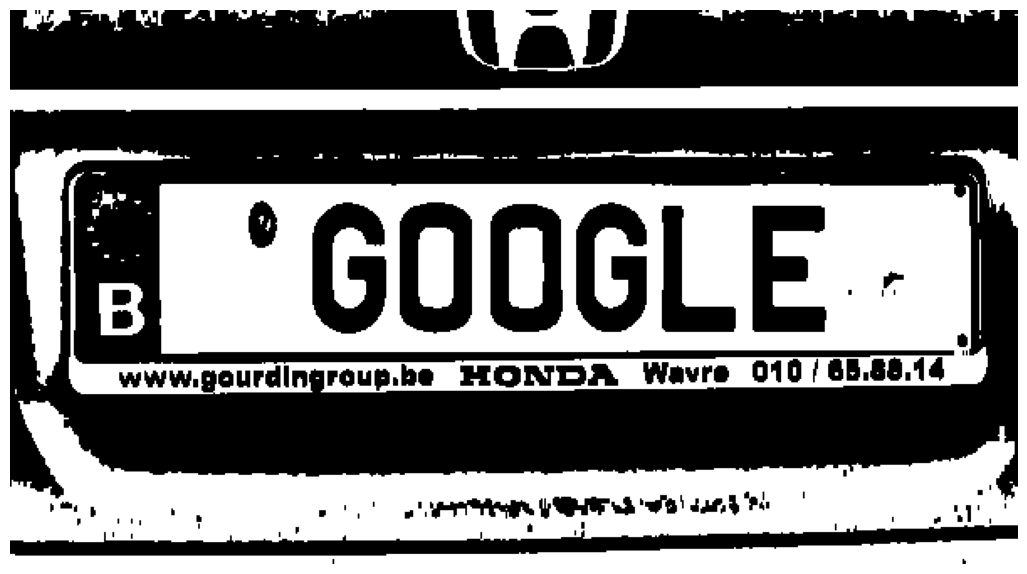

In [362]:
erosion = cv.erode(binarized, kernel, iterations=1)
cvlib.imgview(erosion)

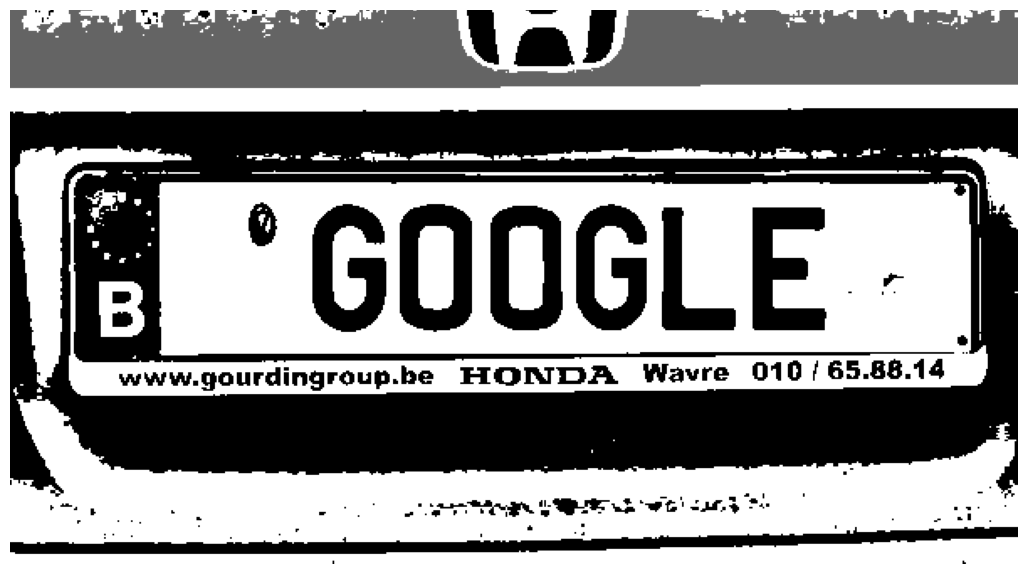

In [363]:
im_floodfill = binarized.copy()
D = 0
cv.floodFill(im_floodfill, None, (0 ,0), 100,  loDiff=D, upDiff=D, flags=cv.FLOODFILL_FIXED_RANGE)
# view_lim(im_floodfill)
cvlib.imgview(im_floodfill)

In [425]:
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(binarized, mode, method[0])

In [426]:
contorno = []
caracteristicas = []
extent = 0

for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    x,y,w,h = cv.boundingRect(c)
    area = cv.contourArea(approx)
    if (w>h and area > 4000): #pongo el mínimo del área
        rect_area = w*h
        extent1 = float(area)/rect_area
        if extent1 > extent:
            extent = extent1
            contorno = c
            caracteristicas = [x,y,w,h]

In [427]:
len(contours)

299

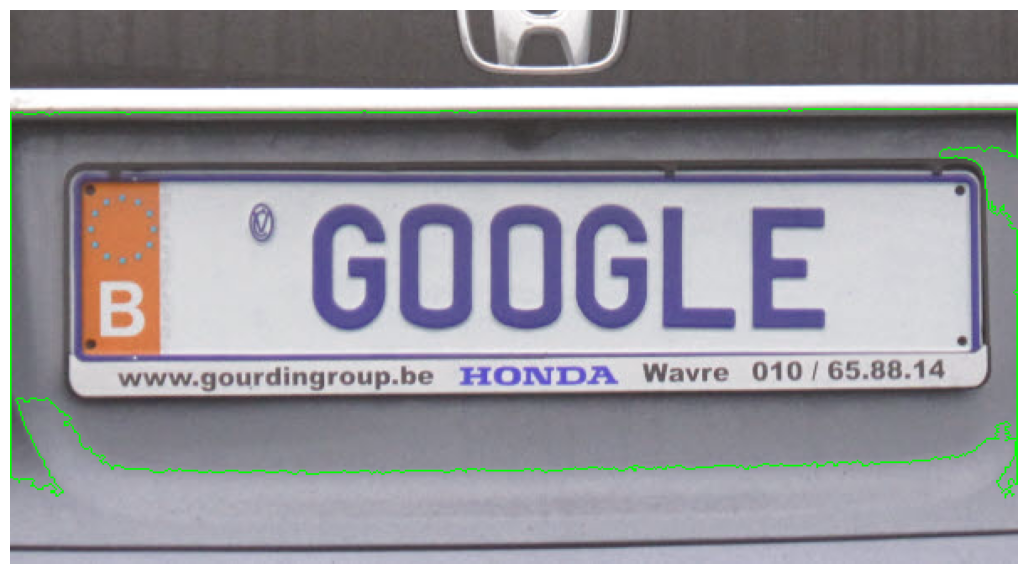

In [428]:
cvlib.imgview(cv.drawContours(im.copy(), contorno, -1, color, 1))

In [368]:
caracteristicas

[]

In [367]:
placa = im[caracteristicas[1]:caracteristicas[1]+caracteristicas[3],caracteristicas[0]:caracteristicas[0]+caracteristicas[2]]

IndexError: list index out of range

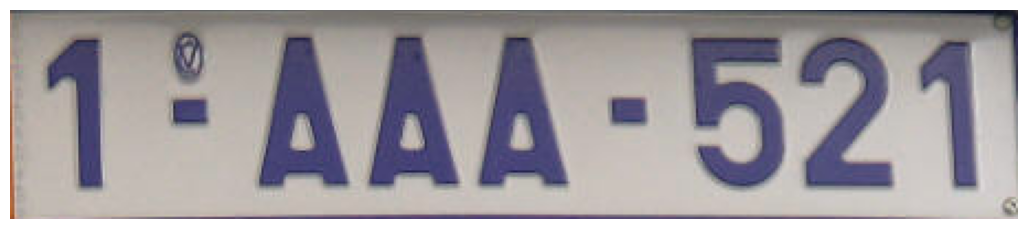

In [ ]:
cvlib.imgview(placa)

In [ ]:
placaBinarized = binarizacion(placa)

In [ ]:
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(placaBinarized, mode, method[0])

In [ ]:
contorno = []
extent = 0

for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    x,y,w,h = cv.boundingRect(c)
    area = cv.contourArea(approx)
    if (w<h and area > 300): #pongo el mínimo del área
        contorno.append(c)
print(len(contorno))

7


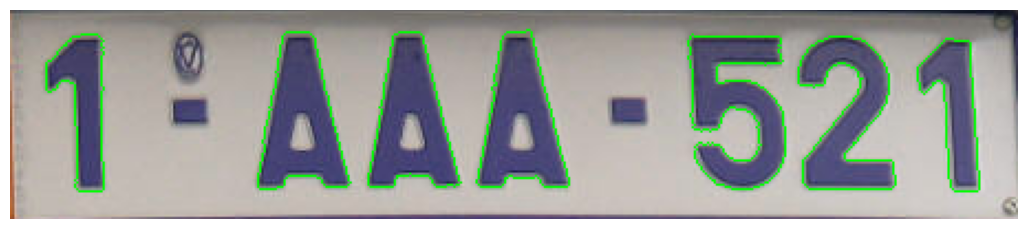

In [ ]:
cvlib.imgview(cv.drawContours(placa.copy(), contorno, -1, color, 1))